# GeoPandas-Beispiele

In den folgenden Beispielen verwenden wir den [nybb](https://data.cityofnewyork.us/dataset/nybb/7t3b-ywvw)-Datensatz.

## GeoPandas-Plot

1. Import

In [1]:
import geopandas as gpd

from geodatasets import get_path

2. Daten lesen

In [2]:
nybb = get_path("nybb")

In [3]:
df = gpd.read_file(nybb)

3. Anzeigen der ersten Zeilen

In [4]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


4. Plotten

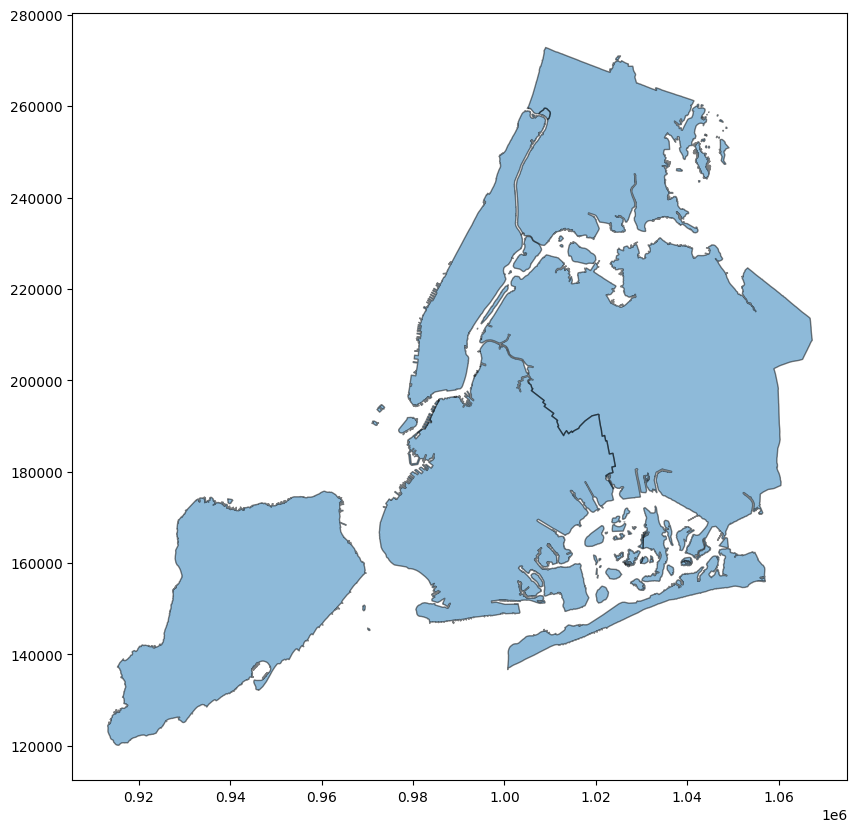

In [5]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

`figsize` gibt die Größe des Plots, `alpha` die Transparenz und `edgecolor` die Kantenfarbe an.

## Plotten in Folium

[Folium](https://python-visualization.github.io/folium/) oder genauer das mit Folium verwendete [leaflet.js](https://leafletjs.com/) verwendet standardmäßig die Werte für Breiten- und Längengrade. Daher müssen wir unsere Werte erst konvertieren:

1. Koordinaten bestimmen

   Um die Daten mit [EPSG-Codes](https://de.wikipedia.org/wiki/Koordinatenreferenzsystem#EPSG-Code) zu verwenden zu können, bietet GeoPandas [geopandas.GeoDataFrame.crs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html) (Coordination Reference System; deutsch: [Koordinatenreferenzsystem](https://de.wikipedia.org/wiki/Koordinatenreferenzsystem)).

In [6]:
print(df.crs)

EPSG:2263


In [7]:
df = df.to_crs(epsg=4326)
print(df.crs)
df.head()

EPSG:4326


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [8]:
import folium

In [9]:
m = folium.Map(
    location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron"
)
for _, r in df.iterrows():
    # without simplifying the representation of each borough, the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(
        data=geo_j,
    )
    folium.Popup(r["BoroName"]).add_to(geo_j)
    geo_j.add_to(m)
m